<a href="https://colab.research.google.com/github/xuxianshan/hello-world/blob/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E7%94%B5%E5%BD%B1%E8%AF%84%E8%AE%BA%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import matplotlib.pyplot as plt

In [4]:
#加载imdb数据集
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


1646592/1641221 [==============================] - 0s 0us/step


In [8]:
#将整数序列编码为二进制矩阵
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
#模型室定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#留出验证集合
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [12]:
#训练模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 142us/step - loss: 0.4979 - acc: 0.7871 - val_loss: 0.3768 - val_acc: 0.8660
Epoch 2/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2954 - acc: 0.9064 - val_loss: 0.3198 - val_acc: 0.8755
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2172 - acc: 0.9287 - val_loss: 0.2908 - val_acc: 0.8826
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1707 - acc: 0.9449 - val_loss: 0.2817 - val_acc: 0.8847
Epoch 5/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1378 - acc: 0.9576 - val_loss: 0.2832 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1107 - acc: 0.9684 - val_loss: 0.3055 - val_acc: 0.8853
Epoch 7/20
15000/15

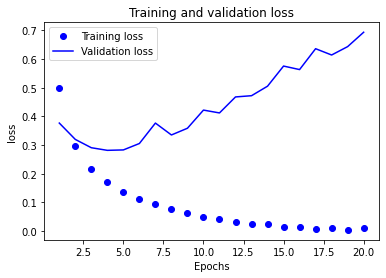

In [14]:
#绘制训练损失和验证损失
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
plt.clf()

<Figure size 432x288 with 0 Axes>

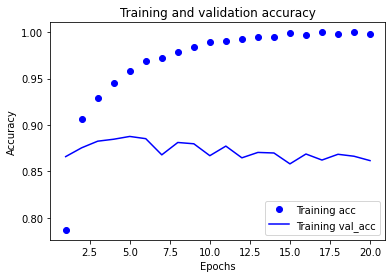

In [17]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
#从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4586 - acc: 0.8099
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2612 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2002 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 73us/step


In [21]:
reslut

NameError: ignored

In [22]:
results

[0.2988544024848938, 0.8818]

In [23]:
#使用训练好的网络在新的数据上生成预测结果
model.predict(x_test)

array([[0.21808934],
       [0.9993059 ],
       [0.89375675],
       ...,
       [0.18194616],
       [0.07394332],
       [0.70336366]], dtype=float32)